# Scraper for Twitter using Tweepy

Package Github: https://github.com/tweepy/tweepy

Package Documentation: https://tweepy.readthedocs.io/en/latest/

Football api: https://www.jokecamp.com/blog/guide-to-football-and-soccer-data-and-apis/

### Notebook Author: Diego González Maneyro

In [3]:
# Pip install Tweepy if you don't already have the package
# !pip install tweepy
# !pip install pandas
# !pip install matplotlib

In [2]:
# Imports
import tweepy
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Credentials and Authorization

You need to set an app here --> https://developer.twitter.com/en/apps

In [3]:
# Credentials

ask to the SuperUser or in the credentials file
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

## Query by Username
Creation of queries using Tweepy API

Function is focused on completing the query then providing a CSV file of that query using pandas

In [4]:
def username_tweets_to_csv(username,count):
    tweets = []
    try: 
    # Pulling individual tweets from query
        for tweet in api.user_timeline(id=username, count=count):

            # Adding to list that contains all tweets
            tweets.append((tweet.created_at,tweet.id,tweet.text,tweet.retweet_count,tweet.favorite_count))

            # Creation of dataframe from tweets list
            tweetsdf = pd.DataFrame(tweets,columns=['Datetime', 'Tweet Id', 'Text', 'ReTweets', 'Favori'])

            # Converting dataframe to CSV
            tweetsdf.to_csv('{}-tweets_by_user.csv'.format(username)) 

    except BaseException as e:
          print('failed on_status,',str(e))
          time.sleep(3)

## Query by Text Search
Function is focused on completing the query then providing a CSV file of that query using pandas

In [5]:
tweets = []

def text_query_to_csv(text_query,count):
    try:
    # Pulling individual tweets from query
        for tweet in api.search(q=text_query, count=count):

          # Adding to list that contains all tweets
          tweets.append((tweet.created_at,tweet.id,tweet.text))

          # Creation of dataframe from tweets list
          tweetsdf = pd.DataFrame(tweets,columns=['Datetime', 'Tweet Id', 'Text'])

          # Converting dataframe to CSV
          tweetsdf.to_csv('{}-tweets_by_text.csv'.format(text_query)) 

    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)

## Query Function Calls
Putting it all together and using functions created.

In [11]:
# Input username to scrape tweets and name csv file
# Max recent tweets pulls x amount of most recent tweets from that user
username = 'podrascreer'
count = 20

# Calling function to turn username's past X amount of tweets into a CSV file
username_tweets_to_csv(username, count)

In [12]:
# Input search query to scrape tweets and name csv file
# Max recent tweets pulls x amount of most recent tweets from that user
text_query = '@sebastiancoates'
count = 150

# Calling function to query X amount of relevant tweets and create a CSV file
text_query_to_csv(text_query, count)

In [13]:
# data = pd.read_csv("sebastiancoates-tweets.csv")
# user_csv_file = text_query + "-tweets_by_text.csv"
user_csv_file = username + "-tweets_by_user.csv"
data = pd.read_csv(user_csv_file) 
 
# Preview the first 5 lines of the loaded data 
data.head(15)

,Unnamed: 0,Datetime,Tweet Id,Text,ReTweets,Favori
0,0,2020-03-29 15:18:23,1244282766902116353,"Ahora más que nunca, todos somos un mismo equi...",1,54
1,1,2020-03-24 18:30:43,1242519227556417537,"Después del entreno, un poco de basket!🏀😀 Par...",26,325
2,2,2020-03-22 21:12:32,1241835174960267265,RT @AUFOficial: 💪🇺🇾⚽\n#TodoElFútbolUnido\n#YoM...,147,0
3,3,2020-03-17 12:18:32,1239888849410670592,¡A CUIDARSE JUNTOS PODEMOS!\n\n#Mequedoencasa ...,17,140
4,4,2020-03-12 18:40:51,1238173122693660672,Em caso de dúvidas ou de sintomas (tosse e feb...,143,769
5,5,2020-03-12 18:40:43,1238173089302790145,todos mais protegidos.\nLava as mãos com água ...,36,234
6,6,2020-03-12 18:39:53,1238172879281369089,"Os jogos estão suspensos, mas queremos todos v...",404,1834
7,7,2020-03-08 22:09:41,1236776128507006981,Bom trabalho da equipa +3!! Buen trabajo del ...,29,368
8,8,2020-02-26 18:53:17,1232740432955789314,Tudo pronto para o jogo de amanhã!!💪🏻💪🏻#europa...,19,383
9,9,2020-02-21 20:55:11,1230959173984292864,RT @EuropaLeague: This team = 😍😍😍\n\n⭐️ Which ...,155,0


## Plotting time

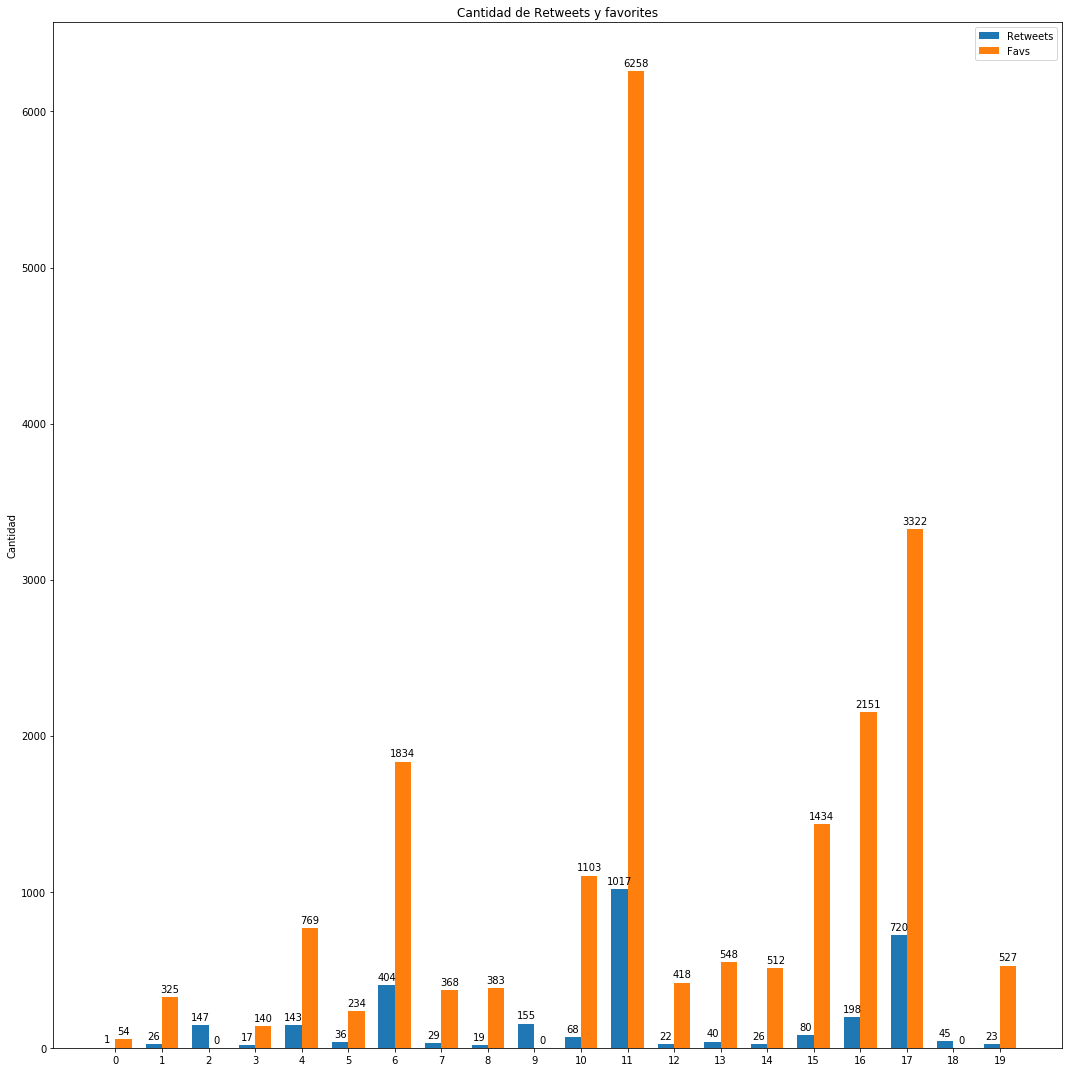

In [17]:
# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]
labels = np.array(range(20))
# labels = data.Datetime.values
retweets = data.ReTweets.values
favs = data.Favori.values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,15))
rects1 = ax.bar(x - width/2, retweets, width, label='Retweets')
rects2 = ax.bar(x + width/2, favs, width, label='Favs')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de Retweets y favorites')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

## Testing place

In [15]:
test_api = api.user_timeline(id=username, count=1)
test_api[0].retweet_count

1

In [58]:
print('último tweet del seba:\n')

print(test_api[3].user.locati
print(':\n')
print()

último tweet del seba:

Uruguay
:




In [26]:
tweet_data[0]

User(_api=<tweepy.api.API object at 0x7fb653982d30>, _json={'id': 52160179, 'id_str': '52160179', 'name': 'Javier S', 'screen_name': 'dejavierto', 'location': 'Rivera, Uruguay', 'description': 'Solo en cines.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 77, 'friends_count': 296, 'listed_count': 1, 'created_at': 'Mon Jun 29 19:30:19 +0000 2009', 'favourites_count': 14249, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 2480, 'lang': None, 'status': {'created_at': 'Sun Mar 29 13:38:26 +0000 2020', 'id': 1244257612092387328, 'id_str': '1244257612092387328', 'text': 'RT @sallelorier: Creo que es un buen momento para que @salleloreal nos distraiga con alguna humorada', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'sallelorier', 'name': 'Dr. Salle Lorier', 'id': 408786542, 'id_str': '408786542', 'indices': [3, 15]}, {'screen_name': 'sallelo

In [6]:
tweet_data = api.followers(id="maurocos89")
locations = {'uru':0,'otros':0,'no_loc':0}
potential_impact = []
for follower in tweet_data:
    
    loc = follower.location
    foll_followers = int(follower.followers_count)
    
    potential_impact.append(foll_followers)
    print(follower.name + " from " + loc + "; -- with " + str(foll_followers) + " followers")
    
    if "rugua" in str(loc) or "ontev" in str(loc):
#         print(loc)
        locations['uru'] = int(locations['uru']) +1
    elif not loc:
        locations['no_loc'] = int(locations['no_loc']) +1
    else:
        locations['otros'] = int(locations['otros']) +1

print(locations)
print(np.median(potential_impact))    

Clara Reyes from ; -- with 118 followers
Fabian Padula from ; -- with 61 followers
vadesign from uruguay; -- with 152 followers
CeciliaAguirrezabala from Uruguay; -- with 126 followers
Agustín Menini from Montevideo, Uruguay; -- with 690 followers
Pesto | Branding, Diseño y Estrategia from Uruguay; -- with 134 followers
Gerardo Bartolomeo from Montevideo, Uruguay; -- with 219 followers
Diego Díaz from Montevideo, Uruguay; -- with 81 followers
Gonza Frevenza from ; -- with 14 followers
Martín Peralta from Montevideo, Uruguay; -- with 57 followers
Leo Sarro Press from Uruguay; -- with 25833 followers
Guadalupe Moles from Uruguay; -- with 56 followers
mateo acosta from Canelones, Uruguay; -- with 48 followers
Fefi Rainaldi Redón from Montevideo; -- with 270 followers
Patricio Gigli from ; -- with 2530 followers
Nancy Cappelli Cerchi from Montevideo, Uruguay; -- with 699 followers
Matías Prego from Montevideo, Uruguay; -- with 503 followers
Mariana Morales from Uruguay; -- with 140 followe

In [9]:
foll_followers

1875

In [7]:
total_followers = len(tweet_data) 
labels = []
sizes = []
for l,val in locations.items():
    labels.append(l)
    sizes.append(round(float(val/total_followers),3)*100)

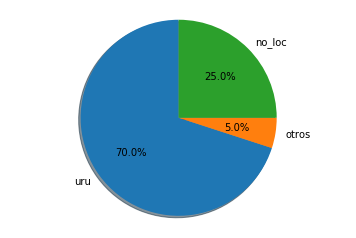

In [8]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# sizes = [15, 30, 45, 10]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()